In [1]:
# importing experiment data
import numpy as np
import pandas as pd
import ast
import math
import matplotlib.pyplot as plt
from scipy.stats import variation

## FOR DESKTOP ## 
# df = pd.read_csv(r'/home/rubi/Desktop/Action Control Lab/python_scripts/typing_task_analysis/typing_task_analysis/Ian_w_video_typingtask_2020_Dec_02_2137.csv')
## FOR LAPTOP ## 
df = pd.read_csv(r'/Users/rubi/Desktop/Action Control Lab/typing_task_analysis/Ian_w_video_typingtask_2020_Dec_02_2137.csv')

In [2]:
df

,string,trials.thisRepN,trials.thisTrialN,trials.thisN,trials.thisIndex,trials_2.thisRepN,trials_2.thisTrialN,trials_2.thisN,trials_2.thisIndex,introduction.started,...,text_4.started,text_4.stopped,text_2.started,text_2.stopped,participant,session,date,expName,psychopyVersion,frameRate
0,kremp,0.0,0.0,0.0,21.0,NaN,NaN,NaN,NaN,18.703082,...,NaN,NaN,NaN,NaN,Ian_w_video,1.0,2020_Dec_02_2137,typingtask,2020.2.8,60.015008
1,incan,0.0,1.0,1.0,16.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Ian_w_video,1.0,2020_Dec_02_2137,typingtask,2020.2.8,60.015008
2,crape,0.0,2.0,2.0,15.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Ian_w_video,1.0,2020_Dec_02_2137,typingtask,2020.2.8,60.015008
3,motel,0.0,3.0,3.0,9.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Ian_w_video,1.0,2020_Dec_02_2137,typingtask,2020.2.8,60.015008
4,lumpo,0.0,4.0,4.0,18.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Ian_w_video,1.0,2020_Dec_02_2137,typingtask,2020.2.8,60.015008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,wooer,NaN,NaN,NaN,NaN,4.0,20.0,116.0,13.0,NaN,...,NaN,NaN,NaN,NaN,Ian_w_video,1.0,2020_Dec_02_2137,typingtask,2020.2.8,60.015008
236,wovet,NaN,NaN,NaN,NaN,4.0,21.0,117.0,22.0,NaN,...,NaN,NaN,NaN,NaN,Ian_w_video,1.0,2020_Dec_02_2137,typingtask,2020.2.8,60.015008
237,yeses,NaN,NaN,NaN,NaN,4.0,22.0,118.0,14.0,NaN,...,NaN,NaN,NaN,NaN,Ian_w_video,1.0,2020_Dec_02_2137,typingtask,2020.2.8,60.015008
238,merry,NaN,NaN,NaN,NaN,4.0,23.0,119.0,8.0,NaN,...,NaN,NaN,NaN,NaN,Ian_w_video,1.0,2020_Dec_02_2137,typingtask,2020.2.8,60.015008


In [3]:
df.columns
df['key_resp.rt'][32]

def get_time_deltas(index):
    times = df['key_resp.rt'][index][1:-1].split(',')
    return [float(times[x+1])-float(times[x]) for x in range(len(times) - 1)]

def get_indexes_for_word(word):
    res = []
    for row in range(len(df)):
        if df['string'][row] == word:
            res.append(row)
    return res

def get_response_for_index(index):
    return ''.join([x[1] for x in df['key_resp.keys'][index][1:-1].split(', ')])

def get_stroke_deltas_from_words(word):
    indexes = get_indexes_for_word(word)
    delta_for_word_experiments = []
    for index in indexes:
        # remove invalid inputs
        response = get_response_for_index(index)
        if response != df['string'][index]:
            continue
            
        delta_for_word_experiments.append(get_time_deltas(index))
    return delta_for_word_experiments

def get_difference_in_stroke_across_word_samples(word):
    deltas = get_stroke_deltas_from_words(word)
    
    res = []
    for sample in range(len(deltas) - 1):
        difference_sum = 0
        
        a = deltas[sample]
        b = deltas[sample + 1]
        
        for delta_index in range(min(len(a), len(b), 5)):
            difference_sum += abs(a[delta_index] - b[delta_index])
        
        res.append(difference_sum / 4.0)
    return res
    
# get_stroke_deltas_from_words('wagon')

<AxesSubplot:>

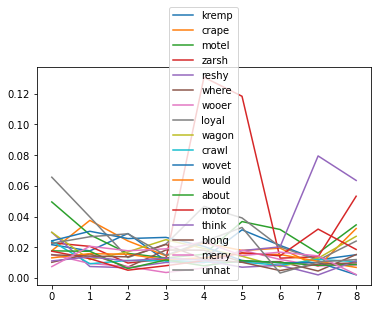

In [4]:
# plotting digraph latency variations with legend

data_to_show = {}

words = {}
for word in df['string']:
    words[word] = True
words = words.keys()

for word in words:
    res = get_difference_in_stroke_across_word_samples(word)
    if len(res) == 9:
        data_to_show[word] = res

data_to_show
stuff = pd.DataFrame(data_to_show)
stuff
stuff.plot()


# x = [1]
# average_diff_between_dilats = plt.plot(x, dilat_avg_diffs, color='red', label='High word freq.')



# x = [0, 1, 2, 3]
# plt.figure(figsize=(10, 7))
# mostfam_plot = plt.plot(x, mostfam_dilatavg, color='red', label='High word freq.')
# semifam_plot = plt.plot(x, semifam_dilatavg, color='blue', label='Medium word freq.')
# unfam_plot = plt.plot(x, unfam_dilatavg, color='green', label='Low word freq.')
# nofam_plot = plt.plot(x, nofam_dilatavg, color='orange', label='Pseudo words')


# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
# plt.xlabel("Latency position in string")
# plt.ylabel("Average CV")
# plt.ylim([0.1, 0.45])
# plt.title("Average CV of Interkey Interval by String Type")
# plt.legend(loc="upper right")

# plt.show()

Text(0.5, 1.0, 'Median of Interkey Interval Differences Between Two Trials')

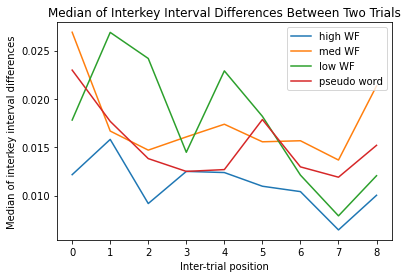

In [5]:
# plotting digraph latency variations with legend
mostfam = ['there', 'about', 'right', 'think', 'would', 'where']
semifam = ['loyal', 'wagon', 'merry', 'motel', 'crawl', 'motor']
unfam = ['unhat', 'wooer', 'yeses', 'crape', 'incan', 'noire']
nofam = ['lumpo', 'reshy', 'blong', 'kremp', 'wovet', 'zarsh']


def plot_table_foo(words):
    data_to_show = {}

    # words = {}
    # for word in df['string']:
    #     words[word] = True
    # words = words.keys()

    for word in words:
        res = get_difference_in_stroke_across_word_samples(word)
        if len(res) == 9:
            data_to_show[word] = res

    data_to_show
    stuff = pd.DataFrame(data_to_show)
    averages = stuff.median(axis = 1)
    
    return averages

  
pd.DataFrame({
    'high WF': plot_table_foo(mostfam),
    'med WF': plot_table_foo(semifam),
    'low WF' : plot_table_foo(unfam),
    'pseudo word' : plot_table_foo(nofam)
}).plot()

# plot_table_foo(semifam_filter, 'semifam_filter')

plt.xlabel("Inter-trial position")
plt.ylabel("Median of interkey interval differences")
plt.title("Median of Interkey Interval Differences Between Two Trials")

In [6]:
# making data nicely usable
def pandas_data_to_columns(pandas):
    columns = list(pandas)
    data_by_column = {}

    KEYS_WITH_STR_ARRAYS = [
        'key_resp.keys',
        'key_resp.rt',
    ]

    max_len = 0

    for column in columns:
        array = []

        for row in pandas[column]:
            if row != row:
                continue
            else:
                if column in KEYS_WITH_STR_ARRAYS:
                    row_list = ast.literal_eval(row)
                    max_len = max(max_len, len(row_list))
                    array.append(row_list)
                else:
                    array.append(row)
        max_len = max(max_len, len(array))
        data_by_column[column] = np.array(array)

    bad_columns = []
    for column in data_by_column:
        if len(data_by_column[column]) != max_len:
            bad_columns.append(column)

    for bad_column in bad_columns:
        del data_by_column[bad_column]

    return data_by_column


def columns_to_trails(columns_data):
    trials = []
    number_of_trials = len(columns_data['string'])

    for trial_num in range(number_of_trials):
        trial = {}
        for column_label in columns_data:
            trial[column_label] = columns_data[column_label][trial_num]
        trials.append(trial)

    return trials

In [7]:
# experiment data structured nicely for column-based organization
column_based_data = pandas_data_to_columns(df)
# experiment data structured nicely for row-based organization
trial_based_data = columns_to_trails(column_based_data)


# making function to nicely print trial data
def print_trials(trials):
    for trial in trials:
        print(trial)

<ipython-input-6-1861e74127bf>:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data_by_column[column] = np.array(array)


In [8]:
trial_based_data

[{'string': 'kremp',
  'text.started': 38.2038100690115,
  'text.stopped': 42.2047574000026,
  'key_resp.keys': ['k', 'r', 'e', 'm', 'p'],
  'key_resp.rt': [0.7867752219899558,
   0.9265715520014055,
   1.0107761579856742,
   1.224757710006088,
   1.3447512399870902],
  'key_resp.started': 38.2038100690115,
  'key_resp.stopped': 42.2047574000026,
  'participant': 'Ian_w_video',
  'session': 1.0,
  'date': '2020_Dec_02_2137',
  'expName': 'typingtask',
  'psychopyVersion': '2020.2.8',
  'frameRate': 60.0150077088397},
 {'string': 'incan',
  'text.started': 44.1551625400025,
  'text.stopped': 48.1550430210191,
  'key_resp.keys': ['i', 'n', 'c', 'a', 'n'],
  'key_resp.rt': [0.6578731399786193,
   0.7285341919923667,
   0.8696501929953229,
   0.9657334889925551,
   1.0990439649904147],
  'key_resp.started': 44.1551625400025,
  'key_resp.stopped': 48.1550430210191,
  'participant': 'Ian_w_video',
  'session': 1.0,
  'date': '2020_Dec_02_2137',
  'expName': 'typingtask',
  'psychopyVersion':

In [9]:
# labelling familiar and unfamiliar terms
mostfam_filter = lambda trial: trial['string'] in ['there', 'about', 'right', 'think', 'would', 'where']
mostfam_trials = list(filter(mostfam_filter, trial_based_data))

semifam_filter = lambda trial: trial['string'] in ['loyal', 'wagon', 'merry', 'motel', 'crawl', 'motor']
semifam_trials = list(filter(semifam_filter, trial_based_data))

unfam_filter = lambda trial: trial['string'] in ['unhat', 'wooer', 'yeses', 'crape', 'incan', 'noire']
unfam_trials = list(filter(unfam_filter, trial_based_data))

nofam_filter = lambda trial: trial['string'] in ['lumpo', 'reshy', 'blong', 'kremp', 'wovet', 'zarsh']
nofam_trials = list(filter(nofam_filter, trial_based_data))

In [10]:
# determining latency to first keypress in familiar vs unfamiliar words
print('keypress lat')
mostfam_delay = list(map(lambda trial: trial['key_resp.rt'][0], mostfam_trials))
mostfam_delayavg = np.mean(mostfam_delay)
print(mostfam_delayavg)

semifam_delay = list(map(lambda trial: trial['key_resp.rt'][0], semifam_trials))
semifam_delayavg = np.mean(semifam_delay)
print(semifam_delayavg)

unfam_delay = list(map(lambda trial: trial['key_resp.rt'][0], unfam_trials))
unfam_delayavg = np.mean(unfam_delay)
print(unfam_delayavg)

nofam_delay = list(map(lambda trial: trial['key_resp.rt'][0], nofam_trials))
nofam_delayavg = np.mean(nofam_delay)
print(nofam_delayavg)

keypress lat
0.578469283388971
0.5551477440322439
0.6177807336309342
0.601879311199203


Text(0.5, 1.0, 'Onset Delay by String Type')

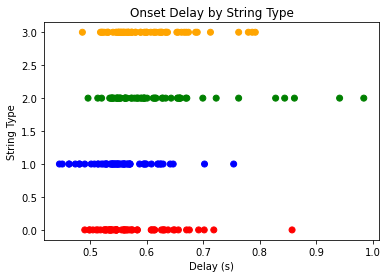

In [11]:
# plotting onset delay as scatter plot by string type without legend

plt.scatter(
    mostfam_delay + semifam_delay + unfam_delay + nofam_delay,
    [0] * len(mostfam_delay) + [1] * len(semifam_delay) + [2] * len(unfam_delay) + [3] * len(nofam_delay),
    c=['red'] * len(mostfam_delay) + ['blue'] * len(semifam_delay) + ['green'] * len(unfam_delay) + ['orange'] * len(nofam_delay),
)

plt.xlabel("Delay (s)")
plt.ylabel("String Type")
plt.title("Onset Delay by String Type")
# plt.show()

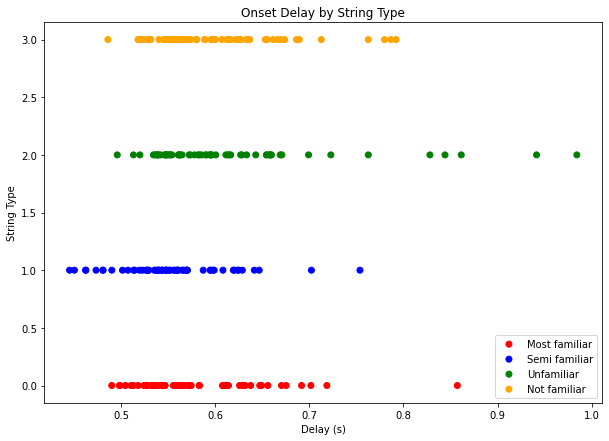

In [12]:
#plotting scatter plot of onset delay with legend
plt.figure(figsize=(10, 7))
mostfam_scatter = plt.scatter(mostfam_delay, [0] * len(mostfam_delay), c=['red'] * len(mostfam_delay), label='Most familiar')
semifam_scatter = plt.scatter(semifam_delay, [1] * len(semifam_delay), c=['blue'] * len(semifam_delay), label='Semi familiar')
unfam_scatter = plt.scatter(unfam_delay, [2] * len(unfam_delay), c=['green'] * len(unfam_delay), label='Unfamiliar')
nofam_scatter = plt.scatter(nofam_delay, [3] * len(nofam_delay), c=['orange'] * len(nofam_delay), label='Not familiar')

plt.xlabel("Delay (s)")
plt.ylabel("String Type")
plt.title("Onset Delay by String Type")
plt.legend(loc= "lower right")

plt.show()

Text(0.5, 1.0, 'Onset Delay by String Type')

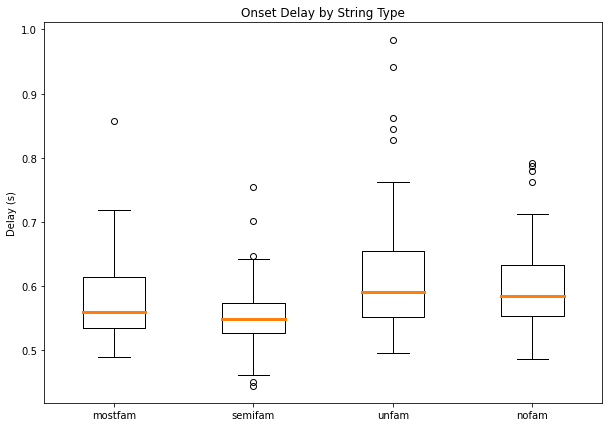

In [13]:
# plotting delay as box and whisker
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot([ mostfam_delay, semifam_delay, unfam_delay, nofam_delay])

colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF']

ax.set_xticklabels(['mostfam', 'semifam',
                    'unfam', 'nofam'])
for median in bp['medians']:
    median.set(linewidth = 3)

plt.xlabel("")
plt.ylabel("Delay (s)")
plt.title("Onset Delay by String Type")

In [14]:
# plotting delay avg as scatter
# plt.scatter(
#     [mostfam_delayavg, semifam_delayavg, unfam_delayavg, nofam_delayavg], [0, 0, 0, 0],
#     c=['red'] + ['blue'] + ['green'] + ['orange'])

In [15]:
# determining overall typing speed of familiar and unfamiliar terms
print('avg speeds')

mostfam_keyresp = list(map(lambda trial: trial['key_resp.rt'], mostfam_trials))
mostfam_speed = list(map(lambda trial: trial['key_resp.rt'][-1] - trial['key_resp.rt'][0], mostfam_trials))
mostfam_speedavg = np.mean(mostfam_speed)
print(mostfam_speedavg)

semifam_keyresp = list(map(lambda trial: trial['key_resp.rt'], semifam_trials))
semifam_speed = list(map(lambda trial: trial['key_resp.rt'][-1] - trial['key_resp.rt'][0], semifam_trials))
semifam_speedavg = np.mean(semifam_speed)
print(semifam_speedavg)

unfam_keyresp = list(map(lambda trial: trial['key_resp.rt'], unfam_trials))
unfam_speed = list(map(lambda trial: trial['key_resp.rt'][-1] - trial['key_resp.rt'][0], unfam_trials))
unfam_speedavg = np.mean(unfam_speed)
print(unfam_speedavg)

nofam_keyresp = list(map(lambda trial: trial['key_resp.rt'], nofam_trials))
nofam_speed = list(map(lambda trial: trial['key_resp.rt'][-1] - trial['key_resp.rt'][0], nofam_trials))
nofam_speedavg = np.mean(nofam_speed)
print(nofam_speedavg)

avg speeds
0.40458710632243555
0.5301237736828626
0.5395681937816941
0.5618610244331649


Text(0.5, 1.0, 'Speed by String Type')

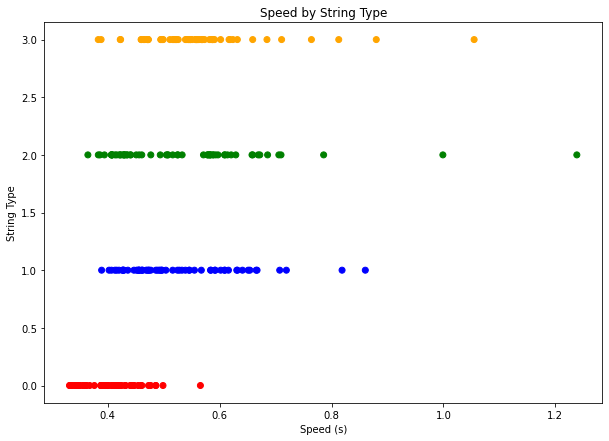

In [16]:
# plotting speed as scatter
plt.figure(figsize=(10, 7))
plt.scatter(
    mostfam_speed + semifam_speed + unfam_speed + nofam_speed,
    [0] * len(mostfam_speed) + [1] * len(semifam_speed) + [2] * len(unfam_speed) + [3] * len(nofam_speed),
    c=['red'] * len(mostfam_speed) + ['blue'] * len(semifam_speed) + ['green'] * len(unfam_speed) + ['orange'] * len(nofam_speed)
)

plt.xlabel("Speed (s)")
plt.ylabel("String Type")
plt.title("Speed by String Type")

Text(0.5, 1.0, 'Speed by String Type')

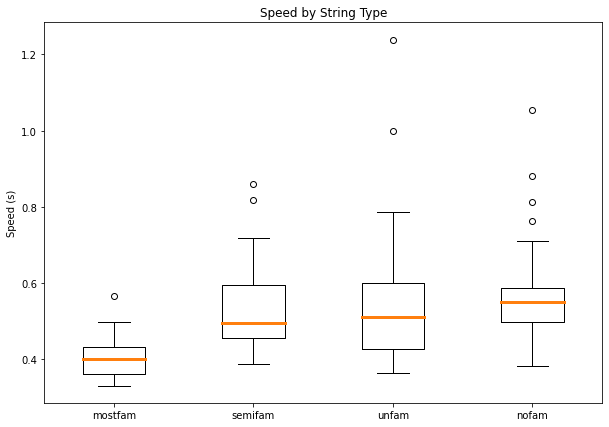

In [17]:
# plotting speeds as box and whisker
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot([ mostfam_speed, semifam_speed, unfam_speed, nofam_speed])

colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF']

ax.set_xticklabels(['mostfam', 'semifam',
                    'unfam', 'nofam'])
for median in bp['medians']:
    median.set(linewidth = 3)

plt.xlabel("")
plt.ylabel("Speed (s)")
plt.title("Speed by String Type")

# plt.show()

In [18]:
# determining digraph latencies for familiar vs unfamiliar terms
print('digraphs lats')

def inner_word_variance(word, trials):
    letter_dilats = []
    for trial in filter(lambda x: x['string'] == word and ''.join(x['key_resp.keys']) == x['string'], trials):
        dilat = np.diff(trial['key_resp.rt'])
        while len(letter_dilats) < len(dilat):
            letter_dilats.append([])
        for i in range(len(dilat)):
            letter_dilats[i].append(dilat[i])
    return [ variation(x) for x in letter_dilats ]

print(inner_word_variance('there', mostfam_trials))

def sequence_variance_averages(trials):
    words = np.unique(list(map(lambda x: x['string'], trials)))
    inner_word_variances = list(map(lambda word: inner_word_variance(word, trials), words))
    average_by_sequence = list(map(lambda x: np.average(x), np.transpose(np.array(inner_word_variances))))
    return average_by_sequence

mostfam_dilatavg = sequence_variance_averages(mostfam_trials)
semifam_dilatavg = sequence_variance_averages(semifam_trials)
unfam_dilatavg = sequence_variance_averages(unfam_trials)
nofam_dilatavg = sequence_variance_averages(nofam_trials)

print(mostfam_dilatavg)

mostfam_dilat = list(
    map(lambda trial: {'string': trial['string'], 'dilat': np.diff(trial['key_resp.rt'])}, mostfam_trials))

# mostfam_inner_word_variances = list(map(lambda word: inner_word_variance(word, mostfam_trials), mostfam))
# stuff = list(map(lambda x: np.average(x), np.transpose(np.array(mostfam_inner_word_variances))))
# print(mostfam_inner_word_variances)


digraphs lats
[0.11103887247131099, 0.15095394751516594, 0.17849790627608877, 0.06353927478482838]
[0.11397933509254117, 0.10656676257979951, 0.10866006129202192, 0.1009418021612825]


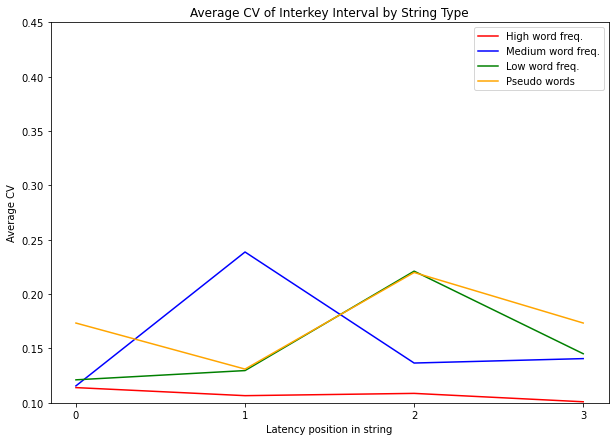

In [19]:
# plotting digraph latency variations with legend
x = [0, 1, 2, 3]
plt.figure(figsize=(10, 7))
mostfam_plot = plt.plot(x, mostfam_dilatavg, color='red', label='High word freq.')
semifam_plot = plt.plot(x, semifam_dilatavg, color='blue', label='Medium word freq.')
unfam_plot = plt.plot(x, unfam_dilatavg, color='green', label='Low word freq.')
nofam_plot = plt.plot(x, nofam_dilatavg, color='orange', label='Pseudo words')


plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel("Latency position in string")
plt.ylabel("Average CV")
plt.ylim([0.1, 0.45])
plt.title("Average CV of Interkey Interval by String Type")
plt.legend(loc="upper right")

plt.show()

In [20]:
# determining error and edit distance for all words
print('errors for all words')

import editdistance as ed

mostfam_error = list(map(lambda trial: {'string': trial['string'], 'input': ''.join(trial['key_resp.keys']),
                                        'matches': trial['string'] == ''.join(trial['key_resp.keys']),
                                        'editdis': (ed.eval(trial['string'], ''.join(trial['key_resp.keys'])))},
                         mostfam_trials))
print(mostfam_error)

semifam_error = list(map(lambda trial: {'string': trial['string'], 'input': ''.join(trial['key_resp.keys']),
                                        'matches': trial['string'] == ''.join(trial['key_resp.keys']),
                                        'editdis': (ed.eval(trial['string'], ''.join(trial['key_resp.keys'])))},
                         semifam_trials))
print(semifam_error)

unfam_error = list(map(lambda trial: {'string': trial['string'], 'input': ''.join(trial['key_resp.keys']),
                                      'matches': trial['string'] == ''.join(trial['key_resp.keys']),
                                      'editdis': (ed.eval(trial['string'], ''.join(trial['key_resp.keys'])))},
                       unfam_trials))
print(mostfam_error)

nofam_error = list(map(lambda trial: {'string': trial['string'], 'input': ''.join(trial['key_resp.keys']),
                                      'matches': trial['string'] == ''.join(trial['key_resp.keys']),
                                      'editdis': (ed.eval(trial['string'], ''.join(trial['key_resp.keys'])))},
                       nofam_trials))
print(mostfam_error)

errors for all words
[{'string': 'where', 'input': 'where', 'matches': True, 'editdis': 0}, {'string': 'there', 'input': 'there', 'matches': True, 'editdis': 0}, {'string': 'would', 'input': 'would', 'matches': True, 'editdis': 0}, {'string': 'about', 'input': 'about', 'matches': True, 'editdis': 0}, {'string': 'think', 'input': 'think', 'matches': True, 'editdis': 0}, {'string': 'right', 'input': 'right', 'matches': True, 'editdis': 0}, {'string': 'where', 'input': 'where', 'matches': True, 'editdis': 0}, {'string': 'about', 'input': 'about', 'matches': True, 'editdis': 0}, {'string': 'think', 'input': 'think', 'matches': True, 'editdis': 0}, {'string': 'would', 'input': 'would', 'matches': True, 'editdis': 0}, {'string': 'right', 'input': 'right', 'matches': True, 'editdis': 0}, {'string': 'there', 'input': 'threre', 'matches': False, 'editdis': 1}, {'string': 'right', 'input': 'right', 'matches': True, 'editdis': 0}, {'string': 'there', 'input': 'there', 'matches': True, 'editdis': 

In [21]:
# determining total error count for familiar vs unfamiliar terms
print('total error for fam vs unfam')

mostfam_totalerror = list(filter(lambda trial: not trial['matches'], mostfam_error))
print(mostfam_totalerror)
print(len(mostfam_totalerror))

semifam_totalerror = list(filter(lambda trial: not trial['matches'], semifam_error))
print(semifam_totalerror)
print(len(semifam_totalerror))

unfam_totalerror = list(filter(lambda trial: not trial['matches'], unfam_error))
print(unfam_totalerror)
print(len(unfam_totalerror))

nofam_totalerror = list(filter(lambda trial: not trial['matches'], nofam_error))
print(nofam_totalerror)
print(len(nofam_totalerror))

total error for fam vs unfam
[{'string': 'there', 'input': 'threre', 'matches': False, 'editdis': 1}]
1
[]
0
[{'string': 'incan', 'input': 'inacn', 'matches': False, 'editdis': 2}, {'string': 'yeses', 'input': 'yesess', 'matches': False, 'editdis': 1}, {'string': 'yeses', 'input': 'yesses', 'matches': False, 'editdis': 1}, {'string': 'noire', 'input': 'mnoire', 'matches': False, 'editdis': 1}]
4
[{'string': 'lumpo', 'input': 'lujo', 'matches': False, 'editdis': 2}]
1


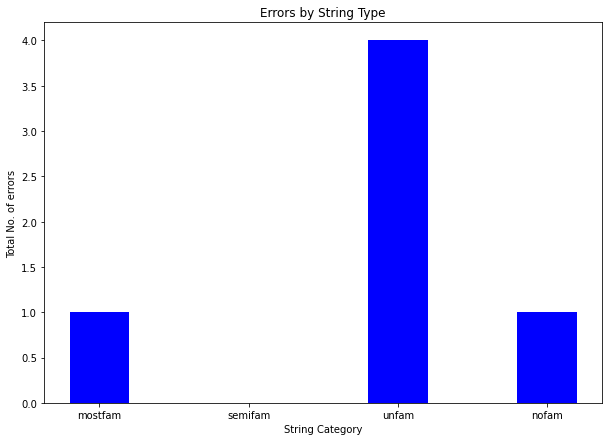

In [22]:
# plotting error count for fam an unfam
mostfam = ['there', 'about', 'right', 'think', 'would', 'where']
semifam = ['loyal', 'wagon', 'merry', 'motel', 'crawl', 'motor']
unfam = ['unhat', 'wooer', 'yeses', 'crape', 'incan', 'noire']
nofam = ['lumpo', 'reshy', 'blong', 'kremp', 'wovet', 'zarsh']

plt.figure(figsize=(10, 7))
plt.bar(['mostfam', 'semifam', 'unfam', 'nofam'], [len(mostfam_totalerror), len(semifam_totalerror), len(unfam_totalerror), len(nofam_totalerror)], color='blue',
        width=0.4)

plt.xlabel("String Category")
plt.ylabel("Total No. of errors")
plt.title("Errors by String Type")
plt.show()

In [23]:
# determining error edit distance for familiar vs unfamiliar terms
print('editdis for fam vs unfam')

mostfam_editdis = list(map(lambda trial: trial['editdis'], mostfam_error))
print(mostfam_editdis)
mostfam_error_editdis = list(filter(lambda trial: trial != 0, mostfam_editdis))
print(mostfam_error_editdis)
mostfam_error_editdisavg = np.mean(mostfam_error_editdis)
print(mostfam_error_editdisavg)

semifam_editdis = list(map(lambda trial: trial['editdis'], semifam_error))
print(semifam_editdis)
semifam_error_editdis = list(filter(lambda trial: trial != 0, semifam_editdis))
print(semifam_error_editdis)
semifam_error_editdisavg = np.mean(semifam_error_editdis)
print(semifam_error_editdisavg)

unfam_editdis = list(map(lambda trial: trial['editdis'], unfam_error))
print(unfam_editdis)
unfam_error_editdis = list(filter(lambda trial: trial != 0, unfam_editdis))
print(unfam_error_editdis)
unfam_error_editdisavg = np.mean(unfam_error_editdis)
print(unfam_error_editdisavg)

nofam_editdis = list(map(lambda trial: trial['editdis'], nofam_error))
print(nofam_editdis)
nofam_error_editdis = list(filter(lambda trial: trial != 0, nofam_editdis))
print(nofam_error_editdis)
nofam_error_editdisavg = np.mean(nofam_error_editdis)
print(nofam_error_editdisavg)

editdis for fam vs unfam
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1]
1.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[]
nan
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 1, 1, 1]
1.25
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2]
2.0


/Users/rubi/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rubi/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


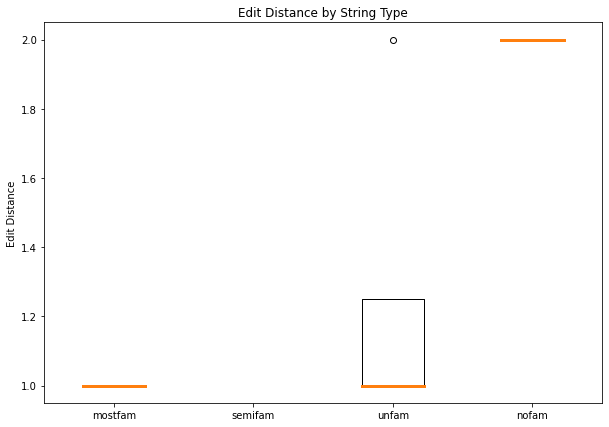

In [24]:
# plotting edit distance for fam and unfam
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot([mostfam_error_editdis, semifam_error_editdis, unfam_error_editdis, nofam_error_editdis])

colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF']

ax.set_xticklabels(['mostfam', 'semifam',
                    'unfam', 'nofam'])
for median in bp['medians']:
    median.set(linewidth = 3)

plt.ylabel("Edit Distance")
plt.title("Edit Distance by String Type")

plt.show()

In [25]:
# determining error for specific words
def word_error(word, fam_totalerror):
    x = list(filter(lambda trial: trial['string'] == word, fam_totalerror))
    return len(x)


plot_labels = []
plot_values = []
plot_colors = []

for word in mostfam:
    plot_labels.append(word)
    plot_values.append(word_error(word, mostfam_totalerror))
    plot_colors.append('red')

for word in semifam:
    plot_labels.append(word)
    plot_values.append(word_error(word, semifam_totalerror))
    plot_colors.append('blue')

for word in unfam:
    plot_labels.append(word)
    plot_values.append(word_error(word, unfam_totalerror))
    plot_colors.append('green')

for word in nofam:
    plot_labels.append(word)
    plot_values.append(word_error(word, nofam_totalerror))
    plot_colors.append('orange')

In [26]:
plot_colors

['red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange']

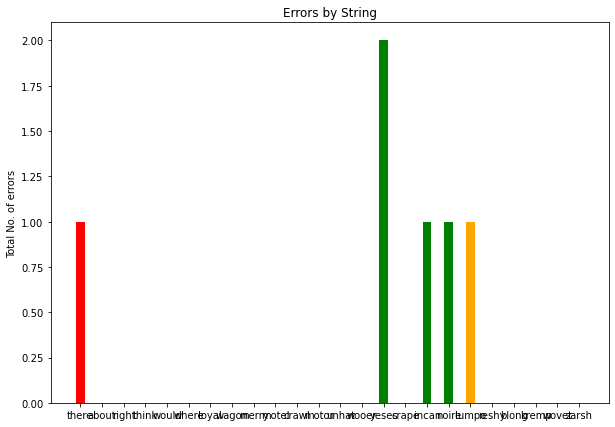

In [27]:
# bar chart for error by word
plt.figure(figsize=(10, 7))
plt.bar(plot_labels, plot_values, color=plot_colors,
        width=0.4)

plt.xlabel("")
plt.ylabel("Total No. of errors")
plt.title("Errors by String")
plt.show()

In [28]:
# edit distance for specific words
def word_totalerror (word, fam_totalerror):
    x = list(filter(lambda trial: trial['string'] == word, fam_totalerror))
    print(x)

word_totalerror('zarsh', nofam_totalerror)

[]
